In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('seaborn')
start = dt.datetime(2020,1,1)
end = dt.datetime(2020,4,5)

main_df = pd.DataFrame()
tickers = ['PETR4.SA']

for ticker in tickers:
    df = web.DataReader(ticker, 'yahoo', start, end)  
    main_df['{}'.format(ticker)] = df['Close'].round(4)
    main_df['Volume'] = df['Volume'].round(0)

main_df.to_csv('')

c:\users\lucas\appdata\local\programs\python\python38-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,PETR4.SA,Volume
Date,,
2020-01-02,30.70,37774500.0
2020-01-03,30.45,71595600.0
2020-01-06,30.81,81844000.0
2020-01-07,30.69,32822000.0
2020-01-08,30.50,48215600.0


In [2]:
database = pd.DataFrame(index=main_df.index)
database = main_df.copy()

database['sma'] = database['PETR4.SA'].rolling(5).mean()
database['volume_bb'] = database['Volume'].rolling(5).mean() + database['Volume'].rolling(5).std()

database.dropna(inplace=True)
database.head()

,PETR4.SA,Volume,sma,volume_bb
Date,,,,
2020-01-08,30.50,48215600.0,30.630,7.583441e+07
2020-01-09,30.40,36102700.0,30.570,7.583640e+07
2020-01-10,30.27,25397500.0,30.534,6.712196e+07
2020-01-13,30.33,30676800.0,30.438,4.317041e+07
2020-01-14,30.00,39796500.0,30.300,4.476117e+07


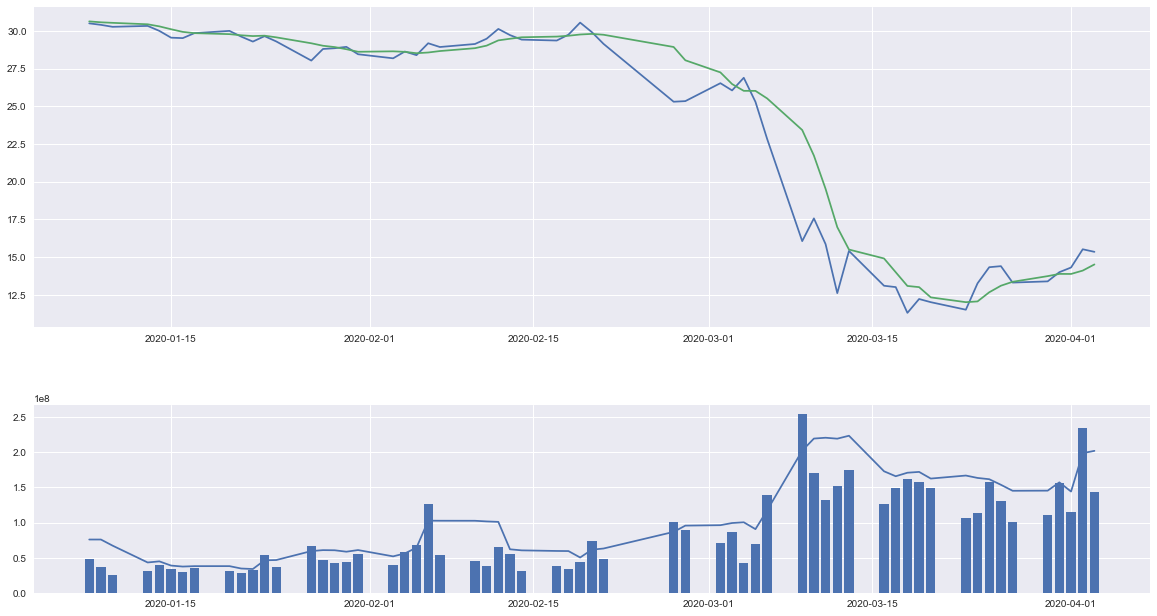

In [3]:
plt.figure(figsize=(20,12))
plt.xticks(database.index)
plt.xlim(pd.Timestamp('2020-01-14'), pd.Timestamp('2020-04-03'))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((10,1), (6,0), rowspan=3, colspan=1, sharex=ax1)

ax1.plot(database.index, database['PETR4.SA'])
ax1.plot(database.index, database['sma'])
ax2.bar(database.index, database['Volume'])
ax2.plot(database.index, database['volume_bb'])

plt.show()

In [5]:
import numpy as np

database['ret'] = np.log(database['PETR4.SA']/database['PETR4.SA'].shift(1))

newtickers = ['PETR4.SA', 'GGBR4.SA', 'ITSA4.SA', 'MGLU3.SA']
db = pd.DataFrame()

for ticker in newtickers:
    df = web.DataReader(ticker, 'yahoo', start, end)  
    db['{}'.format(ticker)] = df['Close'].round(4)
    db['ret-{}'.format(ticker)] = np.log(db['{}'.format(ticker)]/db['{}'.format(ticker)].shift(1))
    
db.dropna(inplace=True)

In [6]:
db.drop(columns=tickers).dropna(inplace=True)

In [10]:
days_db = web.DataReader('PETR4.SA', 'yahoo', start, end)

days_db['days'] = np.where(days_db['Open']<days_db['Close'], 1, -1)

days_db.tail(50)

,High,Low,Open,Close,Volume,Adj Close,days
Date,,,,,,,
2020-01-22,29.809999,29.270000,29.730000,29.290001,32491500.0,29.290001,-1
2020-01-23,29.760000,28.820000,29.090000,29.650000,53752100.0,29.650000,1
2020-01-24,29.780001,29.139999,29.559999,29.299999,36898700.0,29.299999,-1
2020-01-27,28.639999,27.670000,28.629999,28.030001,66105300.0,28.030001,-1
2020-01-28,29.139999,28.420000,28.430000,28.799999,47259100.0,28.799999,1
2020-01-29,29.080000,28.670000,29.000000,28.850000,42297500.0,28.850000,-1
2020-01-30,29.040001,28.180000,28.280001,28.940001,44266800.0,28.940001,1
2020-01-31,28.840000,28.309999,28.629999,28.450001,55446700.0,28.450001,-1
2020-02-03,28.730000,28.160000,28.520000,28.180000,39452800.0,28.180000,-1
